## Exercise 2 : Clustering Method
In this exercise we will explore how each clustering algorithm discussed in the class works.

### Import Library

Import the necessary libraries

In [73]:
!pip install kneed
from kneed import KneeLocator
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import fcluster, linkage, dendrogram
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.impute import SimpleImputer
import scipy.cluster.hierarchy as sch

### Load Dataset
The dataset that we will use is a **Property Dataset**. In this dataset there will be 11 features including: <br>
- Area Category,
- Luas Tanah (m2),
- Luas Bangunan (m2),
- Jumlah Kamar,
- Jumlah Kamar Mandi,
- Tingkat/Lantai,
- Harga Penawaran (dari Owner),
- Terjual/Belum,
- Arah Hadap Rumah,
- Posisi Rumah,
- Lebar Jalan Depan Rumah (ROW). <br>

You can get the dataset from **Elearn**

Load dataset

In [74]:
# load dataset and show the first five sample
df = pd.read_csv("https://raw.githubusercontent.com/Livanty/DatasetW2/refs/heads/main/property_dataset.csv")
df.head()

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Below Standard,Setro Baru Utara,30.0,60.0,2.0,1.0,2.0,287799000,Belum,NaN,Standard,< 1 Mobil
2,Standard,Kenjeran,170.0,170.0,5.0,4.0,2.0,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187.0,250.0,5.0,5.0,2.0,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350.0,600.0,5.0,5.0,2.0,5000000000,Belum,Barat,Standard,1-2 Mobil


In [75]:
# describe data
df.describe()

,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai
count,307.000000,307.000000,307.000000,306.000000,306.000000
mean,226.908795,266.579805,4.276873,3.339869,1.856209
std,202.149571,213.501196,1.646412,1.632311,0.512702
min,14.000000,14.000000,1.000000,1.000000,1.000000
25%,96.000000,120.000000,3.000000,2.000000,2.000000
50%,162.000000,200.000000,4.000000,3.000000,2.000000
75%,286.000000,332.500000,5.000000,4.000000,2.000000
max,1561.000000,1200.000000,13.000000,13.000000,4.000000


In [76]:
# Check for info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area Category                  307 non-null    object 
 1   Nama Daerah                    307 non-null    object 
 2   Luas Tanah (m2)                307 non-null    float64
 3   Luas Bangunan (m2)             307 non-null    float64
 4   Jumlah Kamar                   307 non-null    float64
 5   Jumlah Kamar Mandi             306 non-null    float64
 6   Tingkat/Lantai                 306 non-null    float64
 7   Harga Penawaran (dari Owner)   307 non-null    object 
 8   Terjual/Belum                  307 non-null    object 
 9   Arah Hadap Rumah               225 non-null    object 
 10  Posisi Rumah                   192 non-null    object 
 11  Lebar Jalan Depan Rumah (ROW)  266 non-null    object 
dtypes: float64(5), object(7)
memory usage: 29.0+ KB


Data Preparation

1. Check if there are any missing values in the data.
2. Check the percentage of null values.
3. Perform label encoding.
4. Apply feature scaling to the data.

1.

In [77]:
df.isnull().sum()

,0
Area Category,1
Nama Daerah,1
Luas Tanah (m2),1
Luas Bangunan (m2),1
Jumlah Kamar,1
Jumlah Kamar Mandi,2
Tingkat/Lantai,2
Harga Penawaran (dari Owner),1
Terjual/Belum,1
Arah Hadap Rumah,83


2.

In [78]:
# Calculate the percentage of null values in each column
null_percentage = df.isnull().mean() * 100

# Display the percentage of null values
null_percentage

,0
Area Category,0.324675
Nama Daerah,0.324675
Luas Tanah (m2),0.324675
Luas Bangunan (m2),0.324675
Jumlah Kamar,0.324675
Jumlah Kamar Mandi,0.649351
Tingkat/Lantai,0.649351
Harga Penawaran (dari Owner),0.324675
Terjual/Belum,0.324675
Arah Hadap Rumah,26.948052


Since there are too many nulls but not up to 50%, it’s better to fill them in using SimpleImputer with the strategy set to 'most_frequent'

In [79]:
from sklearn.impute import SimpleImputer

# Create the SimpleImputer with 'most_frequent' strategy
imputer = SimpleImputer(strategy='most_frequent')

# Apply the imputer to your DataFrame
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Verify the imputation
df_imputed.head()


,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,Standard,Citraland,240.0,300.0,4.0,3.0,2.0,3500000000,Belum,Utara,Standard,1-2 Mobil
1,Below Standard,Setro Baru Utara,30.0,60.0,2.0,1.0,2.0,287799000,Belum,Utara,Standard,< 1 Mobil
2,Standard,Kenjeran,170.0,170.0,5.0,4.0,2.0,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187.0,250.0,5.0,5.0,2.0,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350.0,600.0,5.0,5.0,2.0,5000000000,Belum,Barat,Standard,1-2 Mobil


In [80]:
df_imputed.isnull().sum()

,0
Area Category,0
Nama Daerah,0
Luas Tanah (m2),0
Luas Bangunan (m2),0
Jumlah Kamar,0
Jumlah Kamar Mandi,0
Tingkat/Lantai,0
Harga Penawaran (dari Owner),0
Terjual/Belum,0
Arah Hadap Rumah,0


Drop the column 'Nama Daerah' because all the values are different.

In [81]:
# Drop the 'Nama Daerah' column
df_imputed = df_imputed.drop(columns=['Nama Daerah'])

# Verify the column has been removed
df_imputed.head()

,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,Standard,240.0,300.0,4.0,3.0,2.0,3500000000,Belum,Utara,Standard,1-2 Mobil
1,Below Standard,30.0,60.0,2.0,1.0,2.0,287799000,Belum,Utara,Standard,< 1 Mobil
2,Standard,170.0,170.0,5.0,4.0,2.0,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,187.0,250.0,5.0,5.0,2.0,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,350.0,600.0,5.0,5.0,2.0,5000000000,Belum,Barat,Standard,1-2 Mobil


3.

In [82]:
le = LabelEncoder()
df_imputed['Arah Hadap Rumah'] = le.fit_transform(df_imputed['Arah Hadap Rumah'])
df_imputed['Posisi Rumah'] = le.fit_transform(df_imputed['Posisi Rumah'])

df_imputed['Terjual/Belum'] = df_imputed['Terjual/Belum'].map({'Terjual': 0, 'Belum': 1})
df_imputed['Area Category'] = df_imputed['Area Category'].map({'Sangat Premium': 1, 'Premium': 2, 'Standard': 3, 'Below Standard': 4})
df_imputed['Lebar Jalan Depan Rumah (ROW)'] = df_imputed['Lebar Jalan Depan Rumah (ROW)'].map({'< 1 Mobil': 1, '1-2 Mobil': 2, '> 2 Mobil': 3})
df_imputed.head()

,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,3,240.0,300.0,4.0,3.0,2.0,3500000000,1,3,2,2
1,4,30.0,60.0,2.0,1.0,2.0,287799000,1,3,2,1
2,3,170.0,170.0,5.0,4.0,2.0,2699999999,1,1,0,2
3,1,187.0,250.0,5.0,5.0,2.0,3100000000,1,3,2,2
4,2,350.0,600.0,5.0,5.0,2.0,5000000000,1,0,2,2


To replace incorrect or invalid data in the column "Harga Penawaran (dari Owner)", do the following:

Replace empty values (" ") with "10500000000".

Replace values with commas like "10.500.000.000,00" with "10500000000".

In [83]:
# Replace empty values (" ") with "10500000000"
df_imputed['Harga Penawaran (dari Owner)'] = df_imputed['Harga Penawaran (dari Owner)'].str.replace(' ', '10500000000')

# Replace comma-formatted values (e.g., "10.500.000.000,00") with "10500000000"
df_imputed['Harga Penawaran (dari Owner)'] = df_imputed['Harga Penawaran (dari Owner)'].str.replace('10.500.000.000,00', '10500000000')


check the data type

In [84]:
# Check for info dataset
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Area Category                  308 non-null    int64 
 1   Luas Tanah (m2)                308 non-null    object
 2   Luas Bangunan (m2)             308 non-null    object
 3   Jumlah Kamar                   308 non-null    object
 4   Jumlah Kamar Mandi             308 non-null    object
 5   Tingkat/Lantai                 308 non-null    object
 6   Harga Penawaran (dari Owner)   308 non-null    object
 7   Terjual/Belum                  308 non-null    int64 
 8   Arah Hadap Rumah               308 non-null    int64 
 9   Posisi Rumah                   308 non-null    int64 
 10  Lebar Jalan Depan Rumah (ROW)  308 non-null    int64 
dtypes: int64(5), object(6)
memory usage: 26.6+ KB


Change the data types from:

- float to int
- object to int

In [85]:
# Convert object columns to int
for col in df_imputed.select_dtypes(include=['object']):
    df_imputed[col] = df_imputed[col].astype(int)

In [86]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Area Category                  308 non-null    int64
 1   Luas Tanah (m2)                308 non-null    int64
 2   Luas Bangunan (m2)             308 non-null    int64
 3   Jumlah Kamar                   308 non-null    int64
 4   Jumlah Kamar Mandi             308 non-null    int64
 5   Tingkat/Lantai                 308 non-null    int64
 6   Harga Penawaran (dari Owner)   308 non-null    int64
 7   Terjual/Belum                  308 non-null    int64
 8   Arah Hadap Rumah               308 non-null    int64
 9   Posisi Rumah                   308 non-null    int64
 10  Lebar Jalan Depan Rumah (ROW)  308 non-null    int64
dtypes: int64(11)
memory usage: 26.6 KB


In [87]:
# Assuming you have the DataFrame 'df_imputed' as defined in your code.
df_imputed.columns

Index(['Area Category', 'Luas Tanah (m2)', 'Luas Bangunan (m2)',
       'Jumlah Kamar', 'Jumlah Kamar Mandi', 'Tingkat/Lantai ',
       'Harga Penawaran (dari Owner)', 'Terjual/Belum', 'Arah Hadap Rumah',
       'Posisi Rumah', 'Lebar Jalan Depan Rumah (ROW)'],
      dtype='object')

4.

In [88]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Select numeric columns to scale
numeric_cols = df_imputed.select_dtypes(include=['int64']).columns

# Apply Standard Scaling
df_imputed[numeric_cols] = scaler.fit_transform(df_imputed[numeric_cols])

# Display the first few rows of the scaled DataFrame
df_imputed.head()

,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,0.494434,0.064760,0.156529,-0.168161,-0.207847,0.313723,-0.182491,0.0,0.839497,-0.188069,-0.598758
1,1.742677,-0.977457,-0.971209,-1.386831,-1.438941,0.313723,-0.569600,0.0,0.839497,-0.188069,-2.406773
2,0.494434,-0.282646,-0.454330,0.441174,0.407700,0.313723,-0.278901,0.0,-1.141845,-5.453988,-0.598758
3,-2.002052,-0.198276,-0.078417,0.441174,1.023247,0.313723,-0.230696,0.0,0.839497,-0.188069,-0.598758
4,-0.753809,0.610683,1.566201,0.441174,1.023247,0.313723,-0.001723,0.0,-2.132516,-0.188069,-0.598758


## K-Means Clustering

Using the elbow method, determine the number of clusters to be formed.

Use the elbow range range(1, 11)

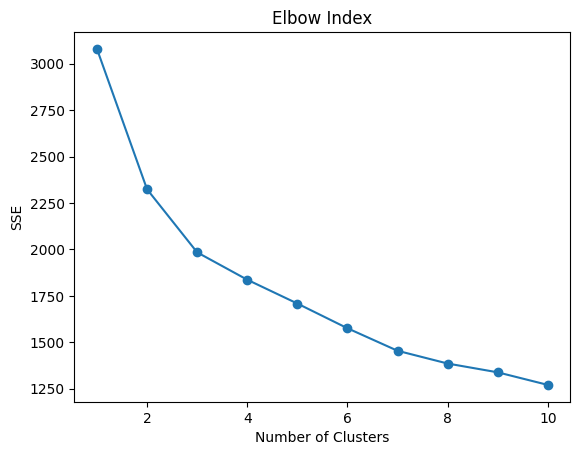

In [89]:
# set the parameter for evaluating K
sse=[]
# check the inertia for each K
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='random', max_iter=300, random_state=42)
    kmeans.fit(df_imputed)
    sse.append(kmeans.inertia_)

# manually visualize the elbow method using plotlib
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title("Elbow Index")
plt.show()

In [90]:
# choosing best K
from kneed import KneeLocator

findknee = KneeLocator(range(1,11), sse, curve="convex", direction="decreasing")
best_k = findknee.knee
print("the best k for your model is ", best_k)

the best k for your model is  3


Train the K-Means model on the dataset with the number of clusters you have determined.

In [91]:
kmeans = KMeans(n_clusters=best_k, init='random', max_iter=300, random_state=42)
kmeans.fit(df_imputed)
labels = kmeans.labels_

In [92]:
from sklearn.preprocessing import StandardScaler

df_imputed['KMeans'] = kmeans.labels_

# Now inverse transform the scaled numeric columns to retrieve the original values
df_imputed[numeric_cols] = scaler.inverse_transform(df_imputed[numeric_cols])

# Display the first few rows of the DataFrame to veriacfy the original values for numeric columns
df_imputed.head()


,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW),KMeans
0,3.0,240.0,300.0,4.0,3.0,2.0,3.500000e+09,1.0,3.0,2.0,2.0,0
1,4.0,30.0,60.0,2.0,1.0,2.0,2.877990e+08,1.0,3.0,2.0,1.0,2
2,3.0,170.0,170.0,5.0,4.0,2.0,2.700000e+09,1.0,1.0,0.0,2.0,0
3,1.0,187.0,250.0,5.0,5.0,2.0,3.100000e+09,1.0,3.0,2.0,2.0,0
4,2.0,350.0,600.0,5.0,5.0,2.0,5.000000e+09,1.0,0.0,2.0,2.0,0


Display the cluster summary in the form of a dataframe:

1. For categorical columns: mode (use pd.Series.mode to find the mode; you do not need to use " " for this attribute).
2. For continuous columns: mean.
3. Cluster results: count.

In [93]:
# Aggregation function for mode
def mode(series):
    return series.mode()[0] if not series.mode().empty else np.nan

# Dictionary for aggregation methods with min, max, and mode for categorical columns
agg_dict = {
    'Area Category': [mode, 'min', 'max'],
    'Luas Tanah (m2)': ['mean', 'min', 'max'],
    'Luas Bangunan (m2)': ['mean', 'min', 'max'],
    'Jumlah Kamar': [mode, 'min', 'max'],
    'Jumlah Kamar Mandi': [mode, 'min', 'max'],
    'Tingkat/Lantai ': [mode, 'min', 'max'],
    'Harga Penawaran (dari Owner)': ['mean', 'min', 'max'],
    'Terjual/Belum': mode,
    'Arah Hadap Rumah': mode,
    'Posisi Rumah': mode,
    'Lebar Jalan Depan Rumah (ROW)': mode
}

# Grouping and aggregating the data
agg_result = df_imputed.groupby('KMeans').agg(agg_dict)

# Flattening MultiIndex columns for better readability
agg_result.columns = [f"{col[0]} ({col[1]})" if col[1] else col[0] for col in agg_result.columns]

# Transposing the result to swap rows and columns
agg_result_transposed = agg_result.transpose()

# Displaying the transposed result as a styled DataFrame for better visualization
agg_result_styled = agg_result_transposed.style.format(precision=2)

# Display the styled DataFrame
agg_result_styled

KMeans,0,1,2
Area Category (mode),2.00,1.00,3.00
Area Category (min),1.00,1.00,2.00
Area Category (max),4.00,4.00,4.00
Luas Tanah (m2) (mean),187.38,570.68,118.98
Luas Tanah (m2) (min),50.00,240.00,14.00
Luas Tanah (m2) (max),525.00,1561.00,495.00
Luas Bangunan (m2) (mean),243.81,642.22,117.59
Luas Bangunan (m2) (min),75.00,350.00,14.00
Luas Bangunan (m2) (max),600.00,1200.00,495.00
Jumlah Kamar (mode),4.00,5.00,2.00


In [94]:
df_imputed['KMeans'].value_counts().sort_index()

,count
KMeans,
0,156
1,50
2,102


In [95]:
# write down your interpretation from the cluster that you have been made


**Cluster 1 (Rumah Premium/Besar):**

Rumah-rumah dalam cluster ini memiliki luas tanah dan luas bangunan yang lebih besar dibandingkan cluster lainnya. Jumlah kamar dan kamar mandi juga lebih banyak, sehingga cocok untuk keluarga besar atau mereka yang membutuhkan ruang lebih luas. Harga penawaran dari pemilik rumah di cluster ini sangat tinggi, menunjukkan bahwa rumah dalam cluster ini kemungkinan berada di kawasan elit atau memiliki nilai properti yang tinggi. Jumlah lantai rata-rata 2, dengan beberapa rumah yang memiliki hingga 4 lantai, menandakan arsitektur bertingkat yang lebih mewah. Cluster ini cocok untuk pasar premium, yaitu pembeli dengan daya beli tinggi yang mencari rumah besar di kawasan strategis atau mewah.

**Cluster 0 (Rumah Menengah):**

Rumah di cluster ini memiliki ukuran tanah dan bangunan yang cukup luas namun lebih kecil dibandingkan Cluster 1. Jumlah kamar dan kamar mandi mencukupi untuk kebutuhan keluarga standar. Harga penawaran dari pemilik berada di kisaran yang moderat, sehingga menarik bagi kalangan pembeli yang mencari rumah dengan harga yang terjangkau namun tetap nyaman. Jumlah lantai umumnya 2, ideal untuk keluarga yang menginginkan rumah bertingkat dengan ukuran yang cukup. Cluster ini cocok untuk pasar menengah, yaitu pembeli yang memiliki anggaran moderat namun tetap menginginkan properti yang nyaman.

**Cluster 2 (Rumah Terjangkau/Kecil):**

Rumah-rumah di cluster ini memiliki luas tanah dan bangunan paling kecil dibandingkan cluster lainnya. Jumlah kamar dan kamar mandi lebih sedikit, menunjukkan bahwa rumah dalam cluster ini lebih sederhana, cocok untuk keluarga kecil atau individu yang mencari hunian praktis. Harga penawaran dari pemilik jauh lebih rendah, membuatnya sangat terjangkau bagi segmen pasar dengan anggaran terbatas atau pembeli pertama. Jumlah lantai sebagian besar hanya 1, sesuai dengan rumah kecil atau sederhana. Cluster ini ideal untuk pasar entry-level atau pembeli dengan daya beli rendah yang menginginkan hunian fungsional dan terjangkau.

## Hierarchical Clustering
Hierarchical clustering uses the agglomerative method.

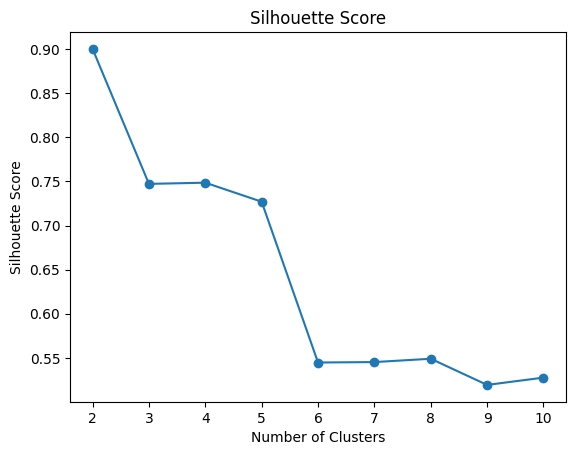

In [96]:
# The image below is not the final result, if yours looks different, that’s okay.
from sklearn.metrics import silhouette_score

silhouette_scores = []

for i in range(2, 11):
    cluster_labels = fcluster(linkage(df_imputed, method='ward'), i, criterion='maxclust')
    silhouette_avg = silhouette_score(df_imputed, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Score = the higher the better
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score")
plt.show()

In [97]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 10):  # Mencoba jumlah cluster dari 2 hingga 9
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_imputed)  # X adalah dataset
    score = silhouette_score(df_imputed, labels)
    silhouette_scores.append(score)
    print(f"Jumlah Cluster: {k}, Silhouette Score: {score}")


Jumlah Cluster: 2, Silhouette Score: 0.8318230248266323
Jumlah Cluster: 3, Silhouette Score: 0.7887062144835412
Jumlah Cluster: 4, Silhouette Score: 0.7728889182203927
Jumlah Cluster: 5, Silhouette Score: 0.6540442917701668
Jumlah Cluster: 6, Silhouette Score: 0.5882323562821918
Jumlah Cluster: 7, Silhouette Score: 0.5872471889997567
Jumlah Cluster: 8, Silhouette Score: 0.5750057740716459
Jumlah Cluster: 9, Silhouette Score: 0.5319120959916848


Perform hierarchical clustering with the Euclidean distance metric and set the number of clusters based on silhouette score.

In [98]:
# Add the cluster labels to the original data that you have been added with kmeans so you have a full dataframe include kmeans and agglo clustering
# Step 1: Perform Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=3)  # Angka 3 karena Silhouette Score-nya cukup tinggi sudah diatas 0.5
agglo_labels = agglo.fit_predict(df_imputed)

# Step 2: Add Agglomerative Clustering labels to the original DataFrame
df_imputed['agglo'] = agglo_labels

# show the df
df_imputed.head()


,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW),KMeans,agglo
0,3.0,240.0,300.0,4.0,3.0,2.0,3.500000e+09,1.0,3.0,2.0,2.0,0,2
1,4.0,30.0,60.0,2.0,1.0,2.0,2.877990e+08,1.0,3.0,2.0,1.0,2,2
2,3.0,170.0,170.0,5.0,4.0,2.0,2.700000e+09,1.0,1.0,0.0,2.0,0,2
3,1.0,187.0,250.0,5.0,5.0,2.0,3.100000e+09,1.0,3.0,2.0,2.0,0,2
4,2.0,350.0,600.0,5.0,5.0,2.0,5.000000e+09,1.0,0.0,2.0,2.0,0,2


Display the cluster summary in the form of a dataframe.

In [99]:
import numpy as np

# Function to calculate mode for each cluster
def mode(series):
    return series.mode().iloc[0] if not series.mode().empty else np.nan

# Repeat for Agglomerative Clustering
agglo_summary = df_imputed.groupby(agglo_labels).agg({
    'Area Category': [mode, 'min', 'max'],
    'Luas Tanah (m2)' : ['mean', 'min', 'max'],
    'Luas Bangunan (m2)' : ['mean', 'min', 'max'],
    'Jumlah Kamar' : [mode, 'min', 'max'],
    'Jumlah Kamar Mandi' : [mode, 'min', 'max'],
    'Tingkat/Lantai ' : [mode, 'min', 'max']
})

# Display summaries
agglo_summary = agglo_summary.rename_axis('agglo')
agglo_summary

Area Category           Luas Tanah (m2)                 \
               mode  min  max            mean    min     max   
agglo                                                          
0               1.0  1.0  3.0      836.250000  600.0  1000.0   
1               2.0  1.0  4.0      524.058824   84.0  1561.0   
2               3.0  1.0  4.0      157.426877   14.0   495.0   

      Luas Bangunan (m2)                Jumlah Kamar             \
                    mean    min     max         mode  min   max   
agglo                                                             
0             975.000000  600.0  1200.0          7.0  5.0   7.0   
1             549.450980   70.0  1100.0          5.0  2.0   8.0   
2             198.490119   14.0   750.0          4.0  1.0  13.0   

      Jumlah Kamar Mandi            Tingkat/Lantai             
                    mode  min   max            mode  min  max  
agglo                                                          
0                    5.0  5.0   8.0             2.0  1.0  3.0  
1                    5.0  1.0   8.0             2.0  1.0  3.0  
2                    4.0  1.0  13.0             2.0  1.0  4.0

In [100]:
import numpy as np

# Function to calculate mode for each cluster
def mode(series):
    return series.mode().iloc[0] if not series.mode().empty else np.nan

# Repeat for Agglomerative Clustering
agglo_summary = df_imputed.groupby(agglo_labels).agg({
    'Harga Penawaran (dari Owner)': ['mean', 'min', 'max'],
    'Terjual/Belum': mode,
    'Arah Hadap Rumah': mode,
    'Posisi Rumah': mode,
    'Lebar Jalan Depan Rumah (ROW)': mode
})

# Display summaries
agglo_summary = agglo_summary.rename_axis('agglo')
agglo_summary

Harga Penawaran (dari Owner)                             Terjual/Belum  \
                              mean           min           max          mode   
agglo                                                                          
0                     5.800000e+10  3.500000e+10  9.900000e+10           1.0   
1                     1.355208e+10  7.000000e+09  2.850000e+10           1.0   
2                     2.455529e+09  1.600000e+08  6.500000e+09           1.0   

      Arah Hadap Rumah Posisi Rumah Lebar Jalan Depan Rumah (ROW)  
                  mode         mode                          mode  
agglo                                                              
0                  3.0          2.0                           2.0  
1                  3.0          2.0                           3.0  
2                  3.0          2.0                           2.0

In [101]:
cluster_counts = df_imputed['agglo'].value_counts().sort_index()
cluster_counts

,count
agglo,
0,4
1,51
2,253


In [102]:
# write down your interpretation from the cluster that you have been made

**Cluster 0 (Rumah Mewah dan Eksklusif)**
Cluster ini mencakup rumah-rumah dengan ukuran tanah dan bangunan yang sangat luas, cocok untuk keluarga besar yang menginginkan ruang yang lega. Jumlah kamar dan kamar mandi lebih banyak, memberikan kenyamanan lebih bagi penghuninya. Rumah-rumah di cluster ini memiliki harga penawaran yang sangat tinggi, menunjukkan bahwa properti dalam kategori ini kemungkinan berada di kawasan elit atau memiliki fasilitas yang eksklusif. Sebagian besar rumah memiliki 2 lantai, menandakan desain rumah bertingkat yang mewah. Jumlah rumah dalam cluster ini sangat sedikit, hanya 4 unit, yang mencerminkan bahwa rumah dalam kategori ini sangat langka dan istimewa.

**Cluster 1 (Rumah Nyaman untuk Keluarga Menengah)**
Cluster ini mencakup rumah-rumah dengan ukuran tanah dan bangunan yang sedang, cukup untuk memenuhi kebutuhan keluarga dengan jumlah anggota standar. Jumlah kamar dan kamar mandi mencukupi, sehingga rumah ini cocok untuk keluarga yang mencari kenyamanan dengan anggaran yang lebih terjangkau dibandingkan Cluster 0. Harga penawarannya berada di kategori menengah, menjadikannya pilihan ideal bagi pembeli yang memiliki daya beli sedang. Sebagian besar rumah memiliki 2 lantai, sehingga memberikan fleksibilitas bagi penghuninya. Jumlah rumah dalam cluster ini adalah 51 unit, cukup banyak untuk memenuhi permintaan pasar menengah.

**Cluster 2 (Rumah Sederhana dan Terjangkau)**
Cluster ini terdiri dari rumah-rumah dengan ukuran tanah dan bangunan yang kecil, cocok untuk individu, pasangan muda, atau keluarga kecil yang mencari hunian sederhana dan fungsional. Jumlah kamar dan kamar mandi lebih sedikit dibandingkan cluster lainnya. Harga penawarannya jauh lebih rendah, menjadikannya pilihan terbaik bagi pembeli dengan anggaran terbatas atau pembeli rumah pertama. Sebagian besar rumah hanya memiliki 1 lantai, yang sesuai dengan konsep rumah sederhana. Cluster ini memiliki jumlah rumah paling banyak, yaitu 253 unit, sehingga dapat menjangkau segmen pasar yang lebih luas, terutama mereka yang membutuhkan hunian yang terjangkau.

**Hierarchical Visualization**

Single Linkage

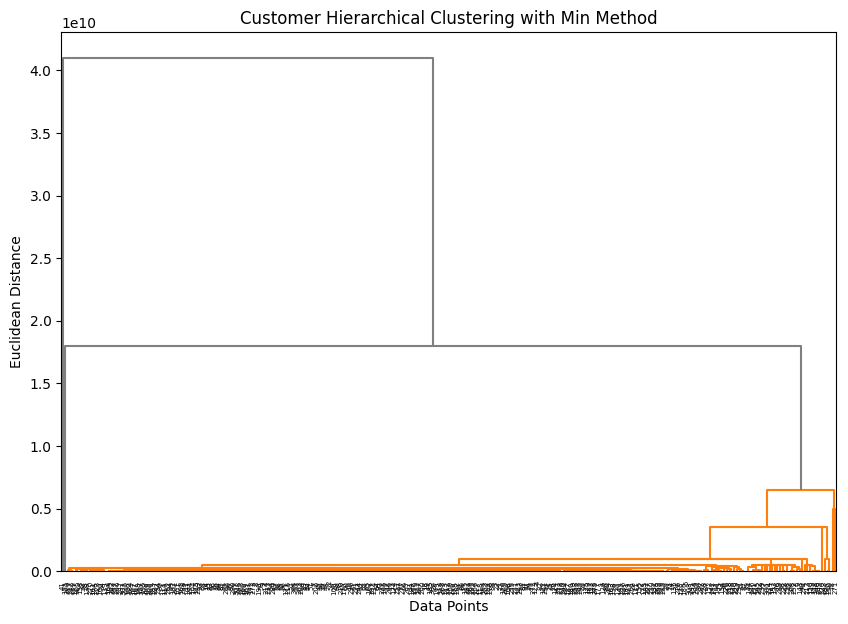

In [107]:
# Min Distance
# Buat linkage matrix
linked = linkage(df_imputed, method='single')

# Tentukan jumlah cluster yang diinginkan
n_clusters = 3

# Gunakan fcluster untuk mendapatkan label cluster
cluster_labels = fcluster(linked, t=n_clusters, criterion='distance')

# Tentukan color_threshold agar sesuai dengan pemotongan
color_threshold = linked[-(n_clusters-1), 2]

# Plot dendrogram dengan color_threshold yang sesuai
plt.figure(figsize=(10, 7))
sch.dendrogram(linked,
           color_threshold=color_threshold,  # Menentukan ketinggian pemotongan sesuai jumlah cluster
           above_threshold_color='grey',     # Warna cabang di atas threshold
           labels=np.arange(1, df.shape[0] + 1))
plt.title("Customer Hierarchical Clustering with Min Method")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

complete linkage

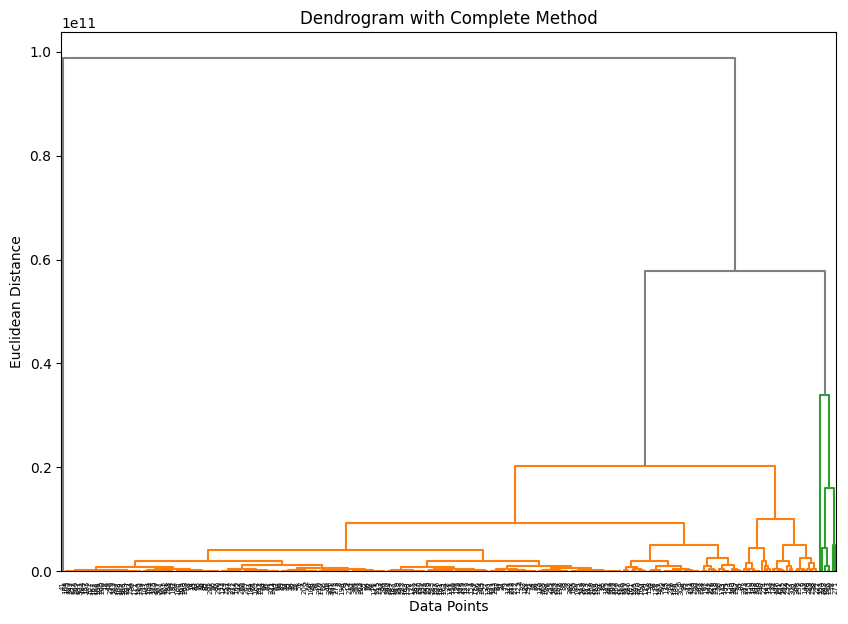

In [104]:
# Max Distance
n_clusters = 3
linked = linkage(df_imputed, method='complete', metric='euclidean')
cluster_labels = fcluster(linked, t=n_clusters, criterion='distance')

color_threshold = linked[-(n_clusters-1), 2]

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked,
           color_threshold=color_threshold,
           above_threshold_color='grey',
           labels=np.arange(1, df.shape[0] + 1))
plt.title("Dendrogram with Complete Method")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

average linkage

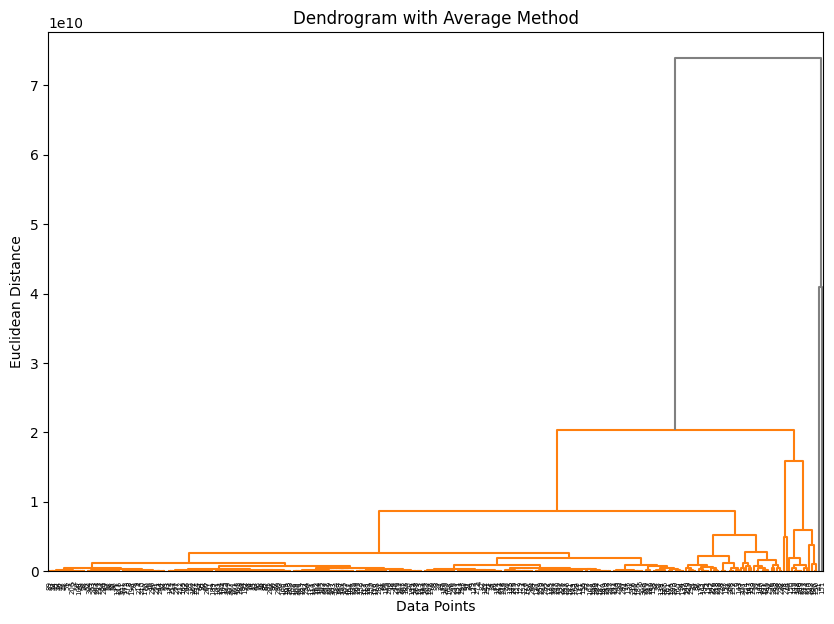

In [105]:
# Average Distance
n_clusters = 3
linked = linkage(df_imputed, method='average', metric='euclidean')
cluster_labels = fcluster(linked, t=n_clusters, criterion='distance')

color_threshold = linked[-(n_clusters-1), 2]

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked,
           color_threshold=color_threshold,
           above_threshold_color='grey',
           labels=np.arange(1, df.shape[0] + 1))
plt.title("Dendrogram with Average Method")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

ward method

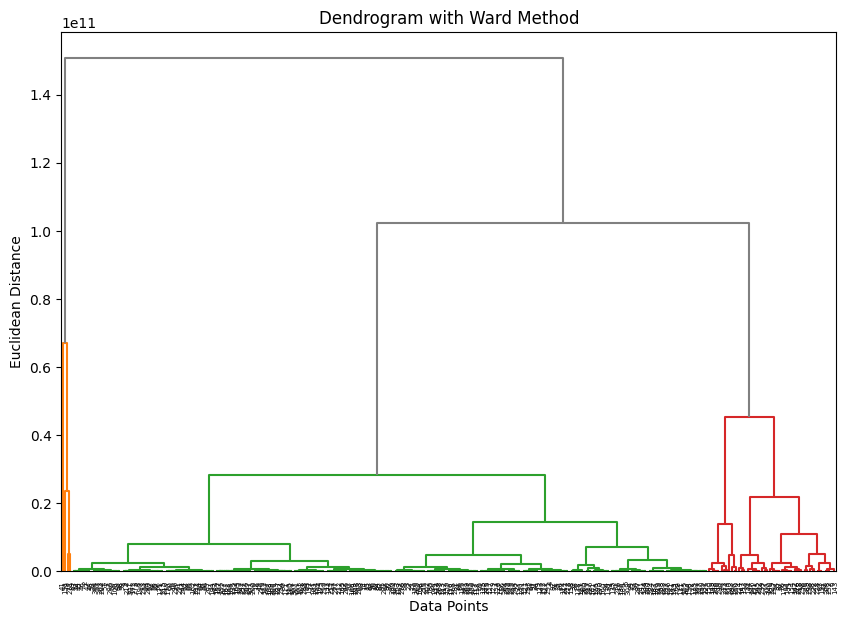

In [106]:
# Ward Method
n_clusters = 3
linked = linkage(df_imputed, method='ward', metric='euclidean')
cluster_labels = fcluster(linked, t=n_clusters, criterion='distance')

color_threshold = linked[-(n_clusters-1), 2]

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked,
           color_threshold=color_threshold,
           above_threshold_color='grey',
           labels=np.arange(1, df.shape[0] + 1))
plt.title("Dendrogram with Ward Method")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()